<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Fig_05_BIG_Segmentation_jan_25_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 78.58 MiB | 38.87 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 266 (delta 44), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (266/266), 7.00 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [ ]:
from big_segment import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)


In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     179  102.128029   84.720131  ...    1.139790    0.549359    0.068163
1     122   84.262558   83.677238  ...  109.101318  115.749527  112.563278
2     161  140.947067  137.049149  ...   66.661629   64.918716   65.584122
3     101    1.000000    0.355945  ...   47.179394   46.870018   46.459270
4     163   68.038956   43.588203  ...    6.885807    6.741427    6.703489
..    ...         ...         ...  ...         ...         ...         ...
45    166   85.253586   86.729858  ...   82.049492   57.206123   32.223976
46    111   89.740929   86.180664  ...   73.211098   74.936447   74.488754
47    131   52.495426   70.309540  ...  105.308197  105.401489  106.762131
48    111   28.454346   33.328300  ...   47.948299   67.120117   68.597923
49    176   91.208153  101.271683  ...   67.561981   79.817146   77.438011

[150 rows x 785 columns]


In [ ]:
del df['Width']
print(df)

           0           1           2    ...         781         782         783
0   102.128029   84.720131   90.808746  ...    1.139790    0.549359    0.068163
1    84.262558   83.677238   83.796829  ...  109.101318  115.749527  112.563278
2   140.947067  137.049149  120.667297  ...   66.661629   64.918716   65.584122
3     1.000000    0.355945    0.000000  ...   47.179394   46.870018   46.459270
4    68.038956   43.588203   30.136477  ...    6.885807    6.741427    6.703489
..         ...         ...         ...  ...         ...         ...         ...
45   85.253586   86.729858   90.147766  ...   82.049492   57.206123   32.223976
46   89.740929   86.180664   43.925499  ...   73.211098   74.936447   74.488754
47   52.495426   70.309540   76.828506  ...  105.308197  105.401489  106.762131
48   28.454346   33.328300   41.174744  ...   47.948299   67.120117   68.597923
49   91.208153  101.271683  100.635323  ...   67.561981   79.817146   77.438011

[150 rows x 784 columns]


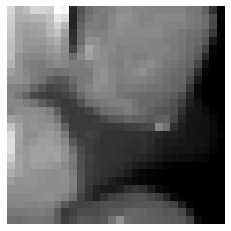

In [ ]:
Size=28
#qual_img=7
#L = Width[qual_img]
data=np.array(df.iloc[0,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.axis('off')
plt.imshow(Foto, cmap = "gray")

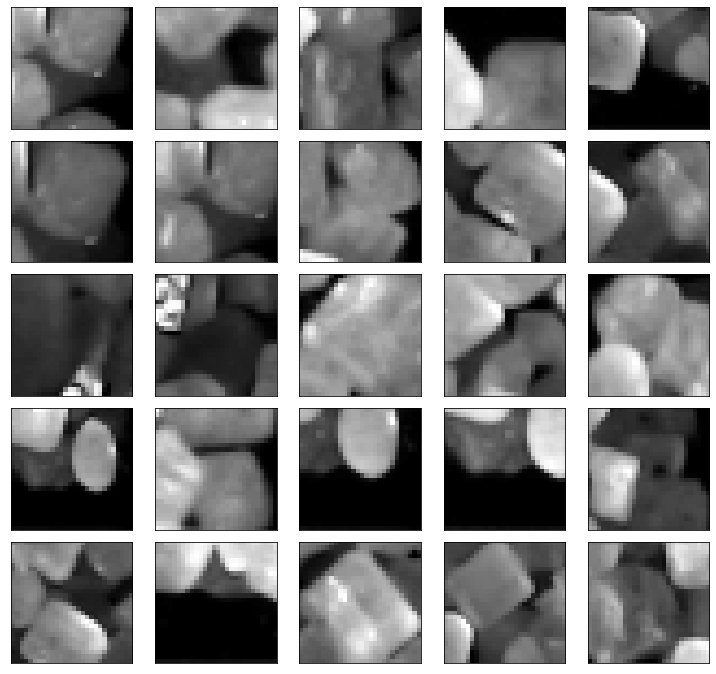

In [ ]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)
